In [1]:
import typing

import numpy as np
import matplotlib.pyplot as plt

## ZADANIE 4

Wartość oczekiwana $f(X)$ zmiennej $Y$ warunkowanej zmienną $X$ ma bardzo ciekawą interpretację, mianowicie spełnia
własność

$$ E(Y \mid X = x) = f(x) = \arg\min_g E \left( (Y - g(X))^2 \right) $$

Oznacza to, że $E (Y |X)$ to najlepsze przybliżenie w sensie $L^2$ zmiennej $Y$ korzystające z danych pochodzących ze
zmiennej $X$. Sprawdź symulacyjnie następujące stwierdzenia.

### CZĘŚĆ 1

Jeśli $X$, $Y$ są zmiennymi niezależnymi a $E (Y ) = 0$, to dla $Z = XY + sin X$ zachodzi $E (Z|X) = sin X$. Jako
przykład możesz wziąć np. $X$, $Y \ iid ∼ N (0, 1)$. Zrób scatterplot $X → Z|X$ wysymulowanych wartości i zaznacz
na nim wartości estymowane oraz teoretyczne $E (Z|X)$.

--------


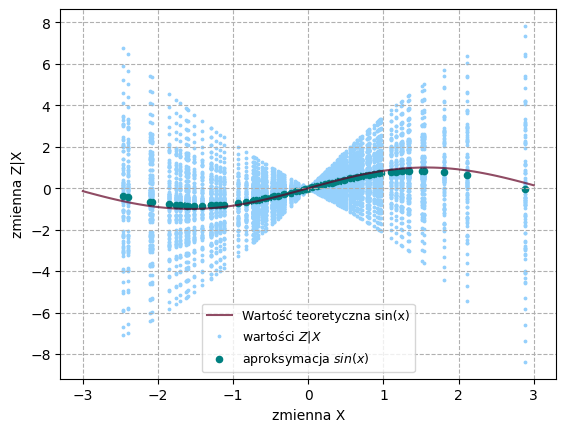

In [8]:
n = 100

X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
Z = X * Y + np.sin(X)

plt.plot(
    np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), color="#610023", alpha=0.7
)

for x in X:
    Z = x * Y + np.sin(x)
    plt.scatter(np.full(len(Z), x), Z, color="#95d0fc", s=3)
    plt.scatter(x, np.mean(Z), color="teal", s=20)

plt.xlabel("zmienna X")
plt.ylabel("zmienna Z|X")
plt.grid(True, linestyle="--")
plt.legend(
    ["Wartość teoretyczna sin(x)", "wartości $Z|X$", "aproksymacja $sin(x)$"],
    fontsize=9,
)
plt.show()

Na powyższym okresie możemy zaobserwować wartości zmiennej $Z|X$ oznaczone kolorem jasnoniebieskim - tworzą one pionowe linie dla poszczególnych X, co wynika z faktu, że zmienna ta obliczana jest po kolei dla poszczególnych $x$. Granatowe punkty to wartości średnie z $Z|X$ a więc wyznaczona w poleceniu aproksymacja wartości $sin(x)$. Jak widać powyżej, pokrywają się one stosunkowo dokładnie z wykresem funkcji $sin(x)$.

### CZĘŚĆ DRUGA

Gdy N jest procesem Poissona o intensywnosci $λ$, to dla $T ≥ t ≥ 0$ zachodzi $E (N_t|N_T ) = tN_T /T$. Oznacza
to, że np. zakładając przybywanie klientów do sklepu zgodnie z procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w chwili $T$ (czyli $N_T$ ), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili $t < T$ równej $N_t$ jest $tN_T /T$. Jako przykład możesz wziąć np. $T = 1, λ = 10$ (zależnie od
metody, niekoniecznie potrzebujesz parametru intensywności). 

Zrób wykres $t → E (N_t|N_T )$ dla kilku możliwych
realizacji $N_T$ i zaznacz na nim wartości estymowane.

-----------
##### Czym jest proces Poissona?

Proces Poissona o intensywności $\lambda$ (gdzie $\lambda > 0$) jest przykładem procesu stochastycznego, który spełnia następujące warunki:

- Zdarzenia zachodzą pojedynczo, tzn. w dowolnym nieskończenie małym przedziale czasowym może zdarzyć się co najwyżej jedno zdarzenie.
- Prawdopodobieństwo wystąpienia zdarzenia w przedziale czasowym długości $t$ jest proporcjonalne do długości tego przedziału i wynosi $\lambda t$.
- Zdarzenia zachodzą niezależnie od siebie, tzn. liczba zdarzeń w rozłącznych przedziałach czasowych jest niezależna.

Liczbę zdarzeń $N(t)$ w przedziale czasowym $[0, t]$ opisuje rozkład Poissona z parametrem $\lambda t$:

$$
P(N(t) = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}, \quad k = 0, 1, 2, \ldots
$$

Proces Poissona znajduje zastosowanie w wielu dziedzinach, takich jak telekomunikacja (modelowanie przychodzących połączeń telefonicznych), fizyka (modelowanie rozpadu radioaktywnego), ekonomia (modelowanie zgłoszeń ubezpieczeniowych) i wiele innych.

##### Aprokrymacja procesu Poissona

W poniższe ćwiczenie polega na wygenerowaniu N procesów Poissona i wyliczenie ich średniej waartości. Następnie wygenerowany wykres wartości średniej zostanie porównany do wartości średniej obliczonej analitycznie podanej w poleceniu:

$$E (N_t|N_T ) = \frac{N_T}{T} t$$

In [3]:
T = 1
lamb = 10


def method2(T: float, NT: int) -> np.ndarray:
    """Generuje proces Poissona o danej liczbie skoków i czasie całkowitym.

    Parameters
    ----------
    T : float
        Całkowity czas trwania procesu.
    NT : int
        Ilość skoków.

    Return
    ----------
    np.ndarray
        Tablica zawierająca czasy skoków w procesie Poissona.
    """
    assert NT != 0, "Warunek NT != 0 nie jest spełniony."

    Us = np.random.uniform(0, T, NT)
    return np.sort(Us)


def poisson_value(s: np.ndarray, t: float) -> int:
    """Odczytuje wartość dla danego czasu t w procesie Poissona.

    Parameters
    ----------
    s : np.ndarray
        Tablica zawierająca czasy skoków w procesie Poissona.
    t : float
        Czas, dla którego ma zostać odczytana wartość.

    Return
    ----------
    int
        Liczba skoków, które wystąpiły przed czasem t.
    """
    count = np.count_nonzero(s < t)
    return count


def mean_poisson_value(t: float, poissons: list) -> float:
    """Oblicza średnią wartość dla danego punktu w wielu procesach.

    Parameters
    ----------
    t : float
        Punkt czasu, dla którego obliczana jest średnia wartość.
    poissons : list
        Lista tablic zawierających czasy skoków w wielu procesach Poissona.

    Return
    ----------
    float
        Średnia wartość dla danego punktu czasowego w wielu procesach.
    """
    mean = 0
    for pois in poissons:
        mean += poisson_value(pois, t)
    return mean / len(poissons)

In [4]:
t_values = np.linspace(0, 1, 100)
repeat = 50

poissons5 = [method2(T, 5) for _ in range(repeat)]
mean_values5 = [mean_poisson_value(t, poissons5) for t in t_values]

poissons20 = [method2(T, 20) for _ in range(repeat)]
mean_values20 = [mean_poisson_value(t, poissons20) for t in t_values]

poissons35 = [method2(T, 35) for _ in range(repeat)]
mean_values35 = [mean_poisson_value(t, poissons35) for t in t_values]

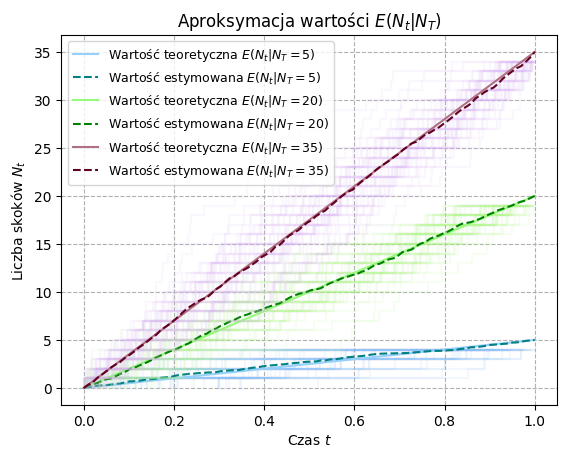

In [5]:
for s in poissons5:
    plt.step(s, np.arange(0, len(s)), color="#83BDF7", alpha=0.1)
plt.plot(
    t_values,
    (5 * t_values / T),
    label="Wartość teoretyczna $E(N_t|N_T = 5)$",
    color="#95d0fc",
)
plt.plot(
    t_values,
    mean_values5,
    label="Wartość estymowana $E(N_t|N_T = 5)$",
    linestyle="--",
    color="teal",
)

for s in poissons20:
    plt.step(s, np.arange(0, len(s)), color="#AFF783", alpha=0.1)
plt.plot(
    t_values,
    (20 * t_values / T),
    label="Wartość teoretyczna $E(N_t|N_T = 20)$",
    color="#96f97b",
)
plt.plot(
    t_values,
    mean_values20,
    label="Wartość estymowana $E(N_t|N_T = 20)$",
    color="g",
    linestyle="--",
)

for s in poissons35:
    plt.step(s, np.arange(0, len(s)), color="#DEB5F8", alpha=0.1)
plt.plot(
    t_values,
    (35 * t_values / T),
    label="Wartość teoretyczna $E(N_t|N_T = 35)$",
    color="#ae7181",
)
plt.plot(
    t_values,
    mean_values35,
    label="Wartość estymowana $E(N_t|N_T = 35)$",
    color="#610023",
    linestyle="--",
)

plt.legend(fontsize=9)
plt.title("Aproksymacja wartości $E(N_t|N_T)$")
plt.xlabel("Czas $t$")
plt.ylabel("Liczba skoków $N_t$")
plt.grid(linestyle="--")
plt.show()

Na powyższym wykresie możemy zaobserwować wartość średnią procesu Poissona dla trzech różnych wartości $N_T = 5, \ 20, \ 35$. Wyraźniejszą linią przerywaną oznaczono wartość aproksymowaną dla $50$ procesów, natomiast linią ciągłą oznaczono wartość teoretyczną obliczoną ze wzoru $E (N_t|N_T ) = \dfrac{tN_T}{T}$. Na wykresie można również zaobserwować wygenerowane procesy Poissona, dla których obliczana była wartość średnia. Zostały one jednak oznaczone ze zwiększoną przeźroczystością, aby zwiększyć czytelność wykresu. Warto zauważyć, że wszystkie oznaczone wartości stosunkowo pokrywają się na wykresach.

### CZĘŚĆ TRZECIA

Gdy $N$ jest procesem Poissona o intensywnosci $λ$, to dla $t ≥ s ≥ 0$ zachodzi $E (N_t|F_s) = N_s + λ(t − s)$, gdzie
$F_s$ to filtracja naturalna procesu $N_s$. Oznacza to, że np. zakładając przybywanie klientów do sklepu zgodnie z
procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w każdej chwili ω spełniającej
$0 ≤ ω ≤ s$ (czyli $F_s$), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili $t ≥ s$ jest $N_s+λ(t−s)
$.
Jako przykład możesz wziąć np. $s = 1$, $λ = 10$. 

Zrób wykres $t → E (N_t|F_s)$ dla kilku możliwych realizacji $N_s$,
$s ≤ t$, i zaznacz na nim wartości estymowane. Podpowiedź: Wygeneruj kilka trajektorii $N_ω, ω ≤ s$ i wybierz z
nich te, które przybierają różne wartości $N_s$ (w tym kroku nie potrzebowałeś użycia parametru intensywności).
Następnie skorzystaj z własności Markowa i dla każdej z wybranych realizacji $N_ω$, $ω ≤ s$ dosymuluj trajektorie
$N_ω$ dla $s < ω ≤ t$, za pomocą których wyestymuj $E (N_t|F_s)$.

--------

W poniższym zadaniu bazujemy na podobnych założeniach jak w części drugiej, jednak tym razem procesy Poissona generowane są jedynie do momentu $s$. Następnie w oparciu o wygenerowane procesy prognozujemy zachowanie procesu o podanym parametrze od momentu $s$ do momentu $2s$. Wynik prognozowany w oparciu o wygenerowane procesy porównywany jest do prognozy wygenerowanej w oparciu o wzór podany w poleceniu:

$$E (N_t|F_s) = N_s + λ(t − s)$$

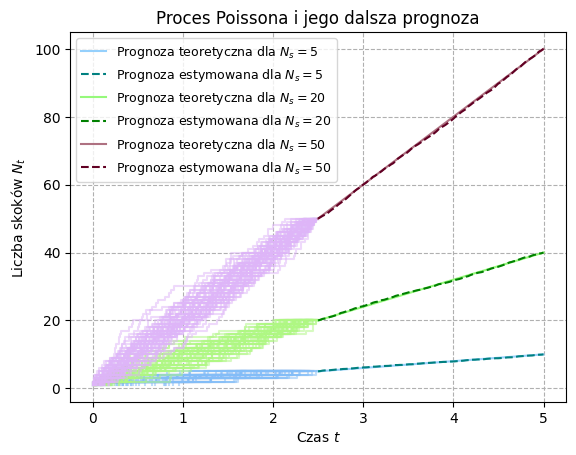

In [6]:
s = 2.5
T = 2 * s
t_to_s = np.linspace(0, s, 100)
t_from_s = np.linspace(s, T, 100)

poissonsS5 = [method2(s, 5) for _ in range(repeat)]
mean_valuesS5 = np.array([mean_poisson_value(t, poissonsS5) for t in t_to_s])

for pois in poissonsS5:
    plt.step(pois, np.arange(1, len(pois) + 1), color="#83BDF7", alpha=0.5)
plt.plot(
    t_from_s,
    5 + (mean_valuesS5[-1] / s) * (t_from_s - s),
    color="#95d0fc",
    label="Prognoza teoretyczna dla $N_s = 5$",
)
plt.plot(
    t_from_s,
    mean_valuesS5 + 5,
    color="teal",
    linestyle="--",
    label="Prognoza estymowana dla $N_s = 5$",
)

poissonsS20 = [method2(s, 20) for _ in range(repeat)]
mean_valuesS20 = np.array([mean_poisson_value(t, poissonsS20) for t in t_to_s])

for pois in poissonsS20:
    plt.step(pois, np.arange(1, len(pois) + 1), color="#AFF783", alpha=0.5)
plt.plot(
    t_from_s,
    20 + (mean_valuesS20[-1] / s) * (t_from_s - s),
    color="#96f97b",
    label="Prognoza teoretyczna dla $N_s = 20$",
)
plt.plot(
    t_from_s,
    mean_valuesS20 + 20,
    color="g",
    linestyle="--",
    label="Prognoza estymowana dla $N_s = 20$",
)

poissonsS50 = [method2(s, 50) for _ in range(repeat)]
mean_valuesS50 = np.array([mean_poisson_value(t, poissonsS50) for t in t_to_s])

for pois in poissonsS50:
    plt.step(pois, np.arange(1, len(pois) + 1), color="#DEB5F8", alpha=0.5)
plt.plot(
    t_from_s,
    50 + (mean_valuesS50[-1] / s) * (t_from_s - s),
    color="#ae7181",
    label="Prognoza teoretyczna dla $N_s = 50$",
)
plt.plot(
    t_from_s,
    mean_valuesS50 + 50,
    color="#610023",
    linestyle="--",
    label="Prognoza estymowana dla $N_s = 50$",
)

plt.xlabel("Czas $t$")
plt.ylabel("Liczba skoków $N_t$")
plt.title("Proces Poissona i jego dalsza prognoza")
plt.grid(linestyle="--")
plt.legend(fontsize=9)
plt.show()

Na powyższym wykresie możemy zaobserwować prognozę dla procesu Poissona od momentu $s=2.5$ dla trzech wartości $N_s = 5, \ 20, \ 50$. Do momentu $t = s$ na wykresie oznaczono 50 wygenerowanych procesów Poissona, natomiast od $t=s$ do $t=T=5$ widzimy aprokrymację dalszych jego zachowań. Podobnie jak w poprzednim zadaniu, linią przerywaną oznaczono wartość aproksymowaną dla $50$ procesów, natomiast linią ciągłą oznaczono wartość teoretyczną obliczoną ze wzoru $E (N_t|F_s) = N_s + λ(t − s)$.